In [2]:
import pandas as pd

df = pd.read_csv('data.csv')

In [3]:
df.head()

,match_id,radiant_adv_nw,radiant_adv_xp,radiant_adv_lh,radiant_win
0,0,707,1238,-39,True
1,1,-193,-1224,9,False
2,2,1035,1470,36,False
3,3,2464,2822,-7,False
4,4,6967,5261,150,True


radiant_adv_nw -> radiant networth advantage

radiant_adv_xp -> radiant xp advantage 

radiant_adv_lh -> radiant last-hits advantage

In [4]:
features = ['radiant networth advantage', 'radiant xp advantage', 'radiant last-hits advantage']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48591 entries, 0 to 48590
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   match_id        48591 non-null  int64
 1   radiant_adv_nw  48591 non-null  int64
 2   radiant_adv_xp  48591 non-null  int64
 3   radiant_adv_lh  48591 non-null  int64
 4   radiant_win     48591 non-null  bool 
dtypes: bool(1), int64(4)
memory usage: 1.5 MB


In [6]:
df.describe()

,match_id,radiant_adv_nw,radiant_adv_xp,radiant_adv_lh
count,48591.000000,48591.000000,48591.000000,48591.000000
mean,24985.900146,212.154535,65.618242,0.570661
std,14437.276318,4465.031571,4232.517767,51.383299
min,0.000000,-38183.000000,-20748.000000,-246.000000
25%,12488.500000,-2478.000000,-2668.500000,-33.000000
50%,24976.000000,207.000000,55.000000,0.000000
75%,37479.500000,2868.000000,2778.500000,35.000000
max,49999.000000,36601.000000,21071.000000,257.000000


## EDA

In [7]:
# Radiant winrate
radiant_wr = (len(df[df.radiant_win==True]) / len(df)) * 100

# Dire winrate 
dire_wr = (len(df[df.radiant_win==False]) / len(df)) * 100

print(f"radiant winrate: {round(radiant_wr, 2)}%")
print(f'dire winrate: {round(dire_wr, 2)}%')


radiant winrate: 51.9%
dire winrate: 48.1%


In [8]:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

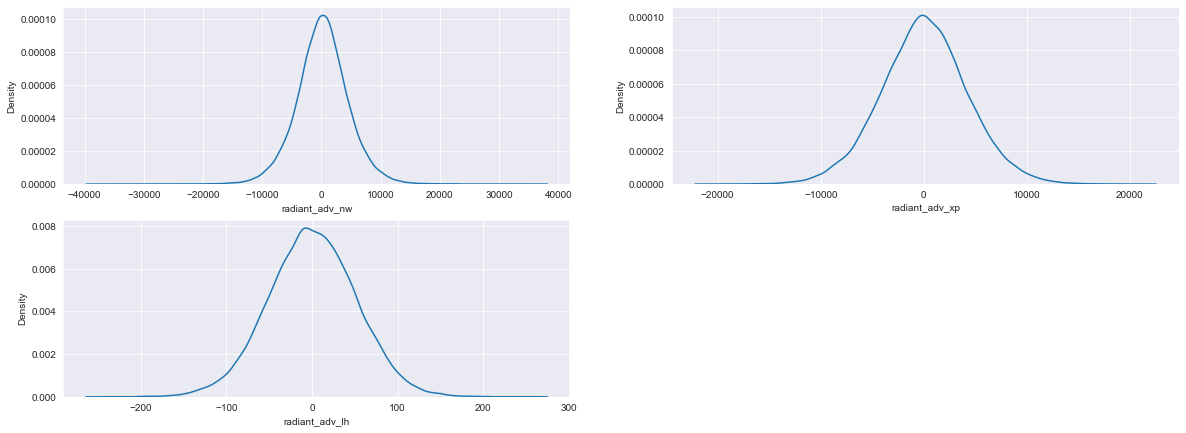

In [9]:
# Probability density function of predictor variables
i=1
plt.figure(figsize=(20,15))
for col in df.columns[1:4]:
    plt.subplot(4,2,i)
    sns.kdeplot(df[col])
    i+=1

The distributions seem to follow a bell curve shape centered around 0.

<AxesSubplot:>

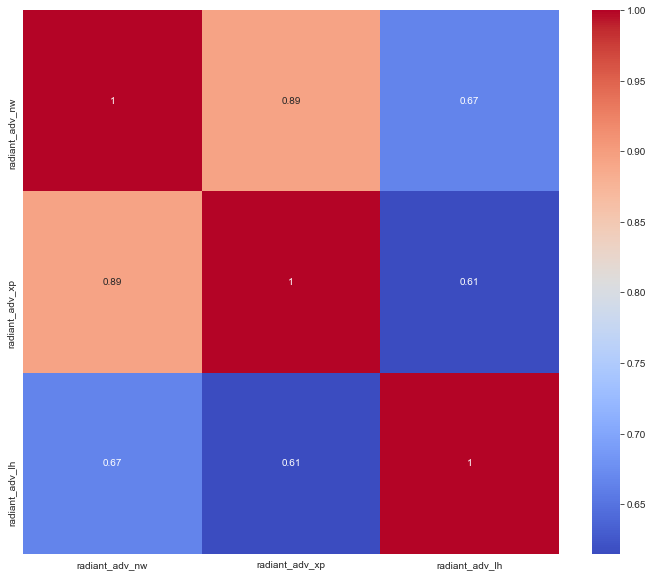

In [10]:
ft_df = df.iloc[:,1:4] # grab only the feature columns 
plt.figure(figsize=(12,10))
sns.heatmap(ft_df.corr(), annot=True, cmap='coolwarm')

The plot above displays the Pearson's R correlation of pairwise comparisons of independent variables. From the plot above, we see that networth and xp advantage correlate strongly positively with 0.89. While co-predictor pair: last hit and networth only show relative moderate strength in correlation with 0.67. 

Text(0.5, 1.0, 'Radiant networth advantage plotted against win outcome')

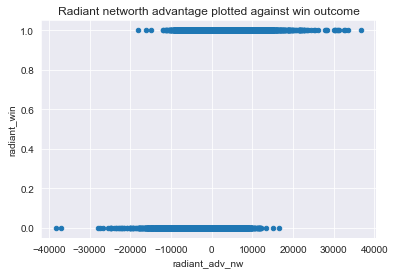

In [11]:
# scatterplots
df['radiant_win'] = df['radiant_win'].astype(int)
df.plot.scatter(x = 'radiant_adv_nw', y= 'radiant_win')
plt.title('Radiant networth advantage plotted against win outcome')

From the plot above, we observe:
- higher instances of radiant win when networth advantage is positive. 
- higher instances of radiant loss when networth advantage is negative.

Text(0.5, 1.0, 'Radiant xp advantage plotted against win outcome')

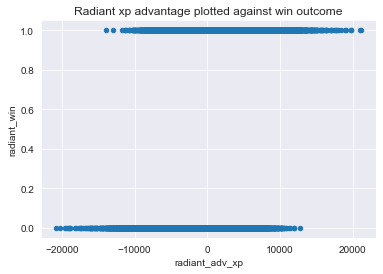

In [12]:
# scatterplots
df.plot.scatter(x = 'radiant_adv_xp', y= 'radiant_win')
plt.title('Radiant xp advantage plotted against win outcome')

Similar findings to the previous plot above:
distribution of predictor data points for radiant win is skewed to the right while it is left-skewed in distribution of data points for radiant loss.

Text(0.5, 1.0, 'Radiant last-hits advantage plotted against win outcome')

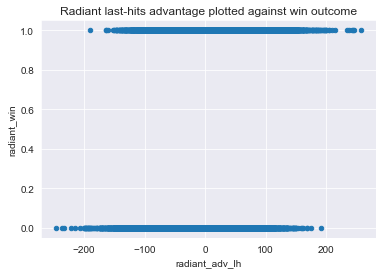

In [13]:
# scatterplots
df.plot.scatter(x = 'radiant_adv_lh', y= 'radiant_win')
plt.title('Radiant last-hits advantage plotted against win outcome')

In [14]:
df.head()

,match_id,radiant_adv_nw,radiant_adv_xp,radiant_adv_lh,radiant_win
0,0,707,1238,-39,1
1,1,-193,-1224,9,0
2,2,1035,1470,36,0
3,3,2464,2822,-7,0
4,4,6967,5261,150,1


We can compute box plots of the features to explore the skewness of the dataset more clearly. 

In [42]:
x = df.iloc[:,1:].values.T
y = df.iloc[:,-1]
box_df = pd.DataFrame(x, index=df.columns[1:])


<AxesSubplot:title={'center':'radiant_adv_nw'}, xlabel='radiant_win'>

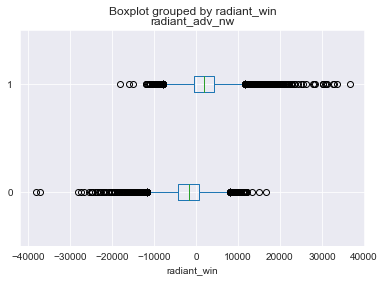

In [45]:
box_df.T.boxplot(column=[feature], by='radiant_win', vert=False)


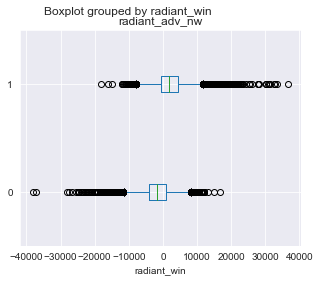

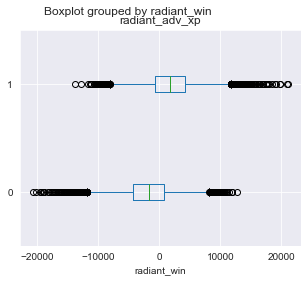

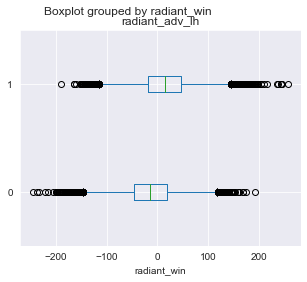

In [46]:
for feature in box_df.T.columns[0:3]:
    box_df.T.boxplot(column=[feature], by='radiant_win', vert=False)
    plt.subplots_adjust(left=0.25)
    plt.show()